In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2.1.2
1.4.1


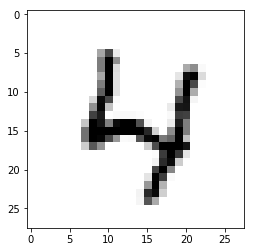

4
(60000,) 5
(60000, 10) [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [34]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

img1 = x_train[314].reshape(-1, 28*28).astype('float32') / 255.0
img1label = y_train[314]

plt.imshow(img1.reshape(28,28), cmap=plt.cm.binary)
plt.show()
print(img1label)

x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

print(y_train.shape, y_train[0])

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

print(y_train.shape, y_train[0])


In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(14*14, input_shape=(28 * 28,), activation='relu'))
#model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
#model.add(keras.layers.Dense(25, activation='relu'))
#model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 196)               153860    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               19700     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 174,570
Trainable params: 174,570
Non-trainable params: 0
_________________________________________________________________


In [33]:
y_test.shape

(10000,)

In [4]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=2, batch_size=200, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 35us/step - loss: 1.4721 - acc: 0.6300 - val_loss: 0.8002 - val_acc: 0.8232
Epoch 2/2
60000/60000 [==============================] - 2s 31us/step - loss: 0.6357 - acc: 0.8464 - val_loss: 0.4956 - val_acc: 0.8810


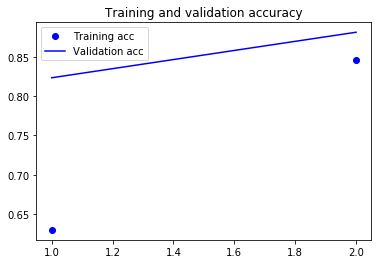

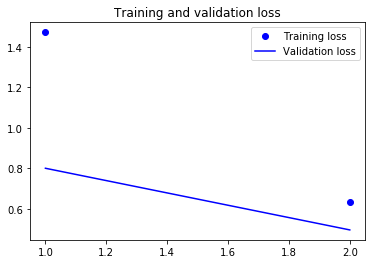

In [5]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
hist.epoch

[0, 1]

In [25]:
import os
from glob import glob
from keras.preprocessing import image
import random

FOLDER = "fashion-mnist"
theSIZE = (28, 28)
theLENGTH = 28*28

# will be non-empty if we are in the directory already
if os.path.exists(FOLDER):
    os.chdir(FOLDER)
elif os.getcwd().split('/')[-1] != FOLDER:
    print("The dataset is not in the current directory, cloning git repo...")
    os.system("git clone https://github.com/zalandoresearch/fashion-mnist")
    os.chdir(FOLDER)

from utils import mnist_reader

x_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

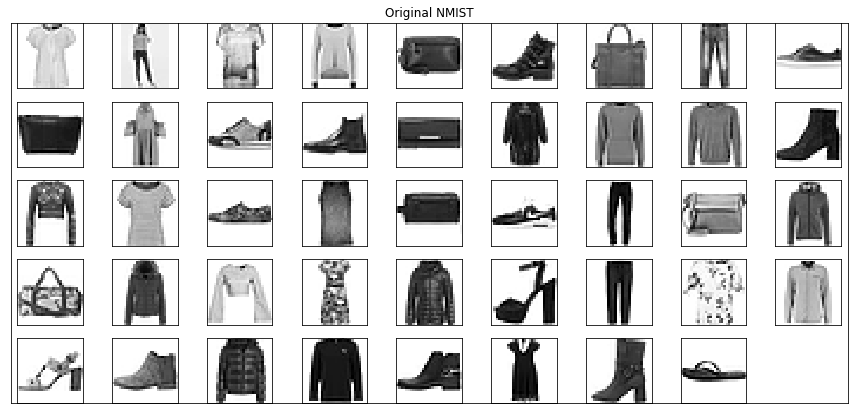

In [30]:
def show_imgs(images, columns=9, figsize=(15,7), title=''):
    fig=plt.figure(figsize=figsize)
    f = plt.title(title)
    f.axes.get_xaxis().set_visible(False)
    f.axes.get_yaxis().set_visible(False)
    rows = np.ceil(len(images)/columns).astype('int')
    for i in range(1, len(images)):
        fig.add_subplot(rows, columns, i)
        f = plt.imshow(images[i], cmap=plt.cm.binary)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()
    
show_imgs([random.choice(x_train).reshape(theSIZE) for i in range(45)], title='Fashion-NMIST')

I wrote about 170 digits and I found out it wasn't so easy to process the images to be similar to the originals - the thickness especially - and I thought they should be still good enough... And regarding the values of the pixels, they are pretty close:


In [ ]:
def show_vals(img):
    for r in img:
        for c in r:
            if c:
                print('{: 2.0f}'.format(c*100), end='', sep='')
            else:
                print('  ', end='', sep='')
        print()

show_vals(random.choice(X).reshape(theSIZE))
show_vals(random.choice(x_train).reshape(theSIZE))

In [ ]:
print("digit => prediction")
correct = 0
counter = [0]*10
for p in range(len(Y)):
    ans = model.predict(X[p].reshape((1, 784)))
    ans = np.argmax(ans)
    print("{}=>{}".format(Y[p], ans), end='\t')
    if Y[p] == ans:
        correct += 1
    counter[ans] += 1
    
print("\n\n{} correct out of {}, that makes it {:.2f}% accurate.".format(correct, len(Y), 100 * correct / len(Y)))
plt.plot(range(10), counter, 'bo', label="Guessed times")
plt.plot(range(10), [Y.count(i) for i in range(10)], 'sr', label='Actual occurence')
plt.title("Model's most favourite number")
plt.legend()
plt.show()